**Step 1: Run SQL query to summarize sales:**

In [1]:
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

**Step 2: Load results into Pandas:**

     product  total_qty  revenue
0  Product A         14    210.0
1  Product B         12    300.0
2  Product C         11    137.5


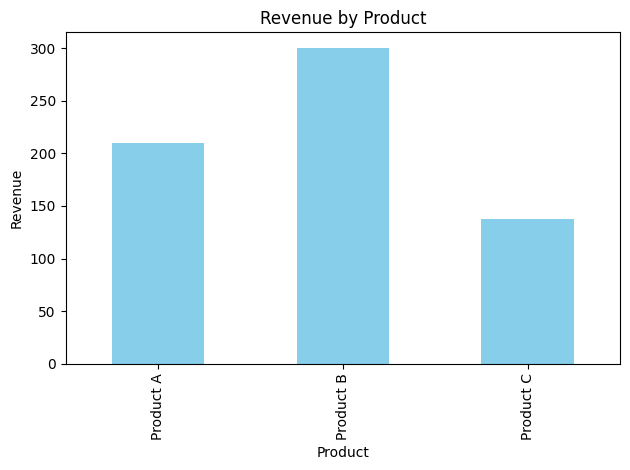

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 1. Connect to (or create) the SQLite database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# 2. Create the sales table (only if it doesn't exist)
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    order_id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# 3. Insert sample data (only if table is empty)
cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:
    sample_data = [
        (1, 'Product A', 10, 15.0),
        (2, 'Product B', 5, 25.0),
        (3, 'Product C', 8, 12.5),
        (4, 'Product A', 4, 15.0),
        (5, 'Product B', 7, 25.0),
        (6, 'Product C', 3, 12.5)
    ]
    cursor.executemany("INSERT INTO sales VALUES (?, ?, ?, ?)", sample_data)
    conn.commit()

# 4. Define the SQL query
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# 5. Run the query and load results into a DataFrame
df = pd.read_sql_query(query, conn)

# 6. Close the connection
conn.close()

# 7. Show the DataFrame
print(df)

# 8. Plot bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()
